In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import os

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor 

In [12]:
df=pd.read_csv(r'C:\Users\Aanjney\Desktop\Deploy\House Price India\House Price India.csv')
df.head()

,id,Date,number of bedrooms,number of bathrooms,living area,lot area,number of floors,waterfront present,number of views,condition of the house,...,Built Year,Renovation Year,Postal Code,Lattitude,Longitude,living_area_renov,lot_area_renov,Number of schools nearby,Distance from the airport,Price
0,6762810145,42491,5,2.50,3650,9050,2.0,0,4,5,...,1921,0,122003,52.8645,-114.557,2880,5400,2,58,2380000
1,6762810635,42491,4,2.50,2920,4000,1.5,0,0,5,...,1909,0,122004,52.8878,-114.470,2470,4000,2,51,1400000
2,6762810998,42491,5,2.75,2910,9480,1.5,0,0,3,...,1939,0,122004,52.8852,-114.468,2940,6600,1,53,1200000
3,6762812605,42491,4,2.50,3310,42998,2.0,0,0,3,...,2001,0,122005,52.9532,-114.321,3350,42847,3,76,838000
4,6762812919,42491,3,2.00,2710,4500,1.5,0,0,4,...,1929,0,122006,52.9047,-114.485,2060,4500,1,51,805000


In [13]:
print("Initial Shape: ",df.shape)

Initial Shape:  (14620, 23)


In [14]:
df = df[["number of bedrooms", "Price", "Postal Code", "Built Year"]]

print("After Column Selection:", df.shape)

After Column Selection: (14620, 4)


In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df["number of bedrooms"] = pd.to_numeric(df["number of bedrooms"], errors="coerce")


In [17]:
df.fillna(df.median(), inplace=True)

In [18]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

print("After Cleaning:", df.shape)

After Cleaning: (13406, 4)


In [19]:
print(df.describe())

       number of bedrooms         Price    Postal Code    Built Year
count        13406.000000  1.340600e+04   13406.000000  13406.000000
mean             3.320155  4.779086e+05  122032.875280   1971.129121
std              0.789803  2.085166e+05      19.047775     29.135964
min              2.000000  7.800000e+04  122003.000000   1900.000000
25%              3.000000  3.150000e+05  122017.000000   1952.000000
50%              3.000000  4.390000e+05  122031.000000   1975.000000
75%              4.000000  6.000000e+05  122048.000000   1996.000000
max              5.000000  1.130000e+06  122072.000000   2015.000000


In [20]:
df.head()

,number of bedrooms,Price,Postal Code,Built Year
3,4,838000,122005,2001
4,3,805000,122006,1929
5,3,790000,122007,1951
6,5,785000,122008,2006
7,3,750000,122006,1923


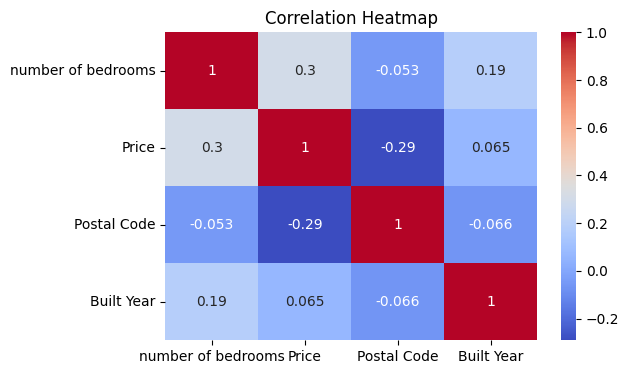

In [21]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

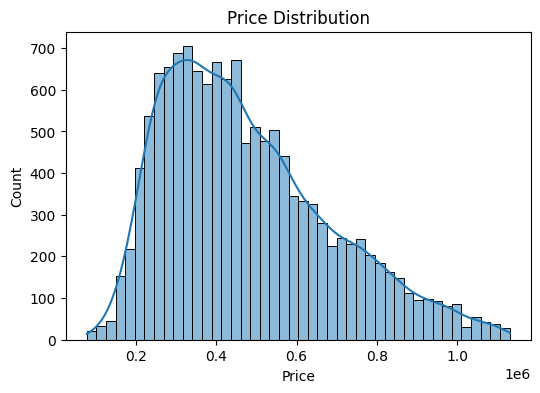

In [23]:
plt.figure(figsize=(6,4))
sns.histplot(df["Price"], kde=True)
plt.title("Price Distribution")
plt.show()

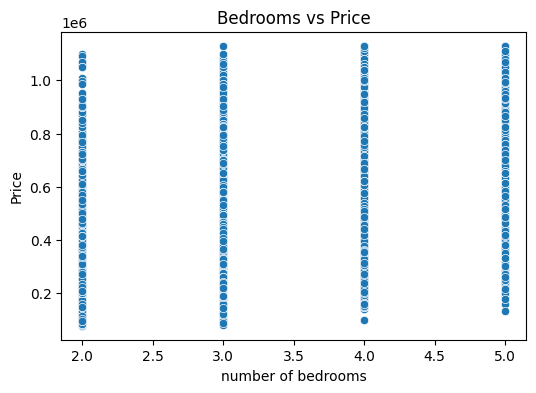

In [24]:
plt.figure(figsize=(6,4))
sns.scatterplot(x=df["number of bedrooms"], y=df["Price"])
plt.title("Bedrooms vs Price")
plt.show()

In [25]:
df["house_age"] = 2026 - df["Built Year"]

X = df.drop("Price", axis=1)
y = df["Price"]


In [26]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [28]:
models = {
    "Linear": LinearRegression(),
    "Ridge": Ridge(),
    "Lasso": Lasso(),
    "DecisionTree": DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor(n_estimators=50),
    "GradientBoosting": GradientBoostingRegressor(),
    "SVR": SVR(),
    "KNN": KNeighborsRegressor()
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    results[name] = [r2, mae, rmse]

results_df = pd.DataFrame(results, index=["R2", "MAE", "RMSE"]).T
print(results_df)

                        R2            MAE           RMSE
Linear            0.159271  151681.632328  190908.951309
Ridge             0.159271  151681.977968  190908.933841
Lasso             0.159271  151681.689332  190908.948870
DecisionTree      0.445253  108118.941433  155076.403949
RandomForest      0.563238   97951.510555  137600.695387
GradientBoosting  0.546092  105422.797242  140275.592781
SVR              -0.026960  165355.312934  210996.418880
KNN               0.430923  112776.127517  157066.604904


In [29]:
best_model_name = results_df["R2"].idxmax()
best_model = models[best_model_name]

print("Best Model:", best_model_name)

Best Model: RandomForest


In [33]:
final_model = {
    "model": best_model,
    "scaler": scaler
}
joblib.dump(final_model, "house_price_model.pkl", compress=3)

print("Model Size (MB):", os.path.getsize("house_price_model.pkl")/(1024*1024))

Model Size (MB): 7.197973251342773
